<a href="https://colab.research.google.com/github/pavithhraaa/loan-approval-app-p/blob/main/Loan_Approval_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE

**Loading dataset**

In [ ]:
df = pd.read_csv('/content/LoanApprovalPrediction.csv')

**Dropping Loan_ID as it's not useful for prediction**

In [ ]:
df.drop('Loan_ID', axis=1, inplace=True)

**Handling missing values & Feauture Engineering**

In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['DebtToIncomeRatio'] = df['LoanAmount'] / df['TotalIncome']
df.drop(['ApplicantIncome', 'CoapplicantIncome'], axis=1, inplace=True)

/tmp/ipython-input-7-60502167.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
/tmp/ipython-input-7-60502167.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

**# Converting '3+' in Dependents to 3**

In [ ]:
df['Dependents'].replace('3+', 3, inplace=True)
df['Dependents'] = df['Dependents'].astype(int)


/tmp/ipython-input-8-3829931180.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Dependents'].replace('3+', 3, inplace=True)


**Encoding categorical variables**

In [ ]:
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
df[categorical_cols] = df[categorical_cols].apply(LabelEncoder().fit_transform)

**Feature-target split**

In [ ]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

**Handling class imbalance using SMOTE**

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


**Feature Scaling**

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

**Train-test split**

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**Model: Random Forest with hyperparameter tuning**

In [ ]:

param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 5],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

best_model = grid.best_estimator_


**Evaluating Model Performance**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


y_pred = best_model.predict(X_test)


print("🔍 Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


🔍 Accuracy: 0.806060606060606

 Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.70      0.78        82
           1       0.75      0.92      0.83        83

    accuracy                           0.81       165
   macro avg       0.82      0.81      0.80       165
weighted avg       0.82      0.81      0.80       165

Confusion Matrix:
 [[57 25]
 [ 7 76]]


**Visualize Feature Importance**

/tmp/ipython-input-17-1738698932.py:14: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


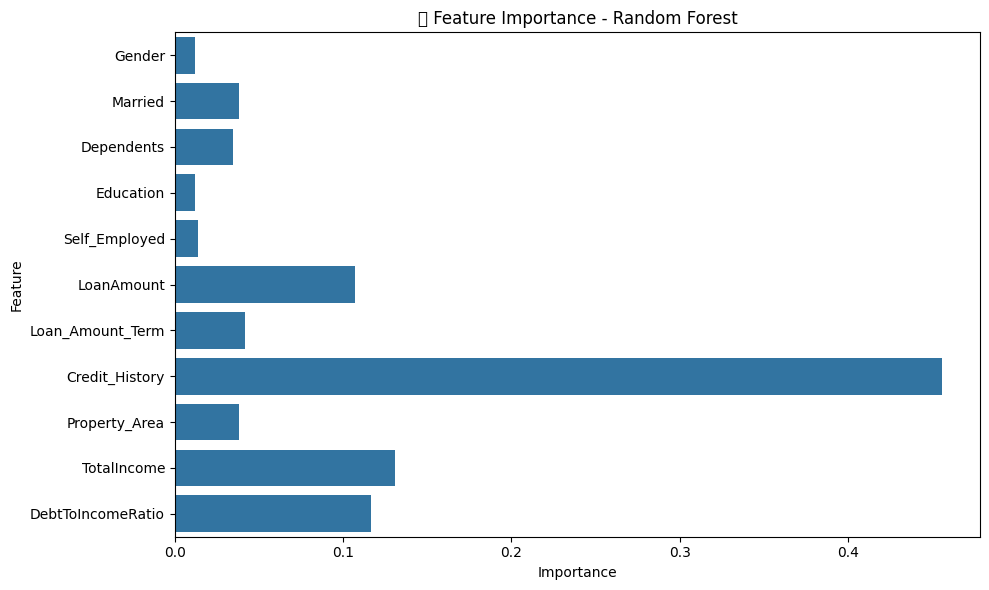

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


importances = best_model.feature_importances_
features = X.columns


plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title("🎯 Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


**Save the Model **

In [ ]:
import joblib


joblib.dump(best_model, 'loan_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

**Predicting on New Data**

In [ ]:

new_data = pd.DataFrame([{
    'Gender': 1, 'Married': 1, 'Dependents': 0, 'Education': 0,
    'Self_Employed': 0, 'LoanAmount': 120, 'Loan_Amount_Term': 360,
    'Credit_History': 1, 'Property_Area': 2,
    'TotalIncome': 5000, 'DebtToIncomeRatio': 0.024
}])


new_data_scaled = scaler.transform(new_data)


prediction = best_model.predict(new_data_scaled)
print("✅ Loan Status Prediction:", "Approved" if prediction[0] == 1 else "Rejected")


✅ Loan Status Prediction: Approved
